<a href="https://colab.research.google.com/github/Syed-Luqman-Shah-19/Interference-Prediction-Using-Gaussian-Process-Regression-for-Critical-Services-in-Local-6G-Networks/blob/main/Interference-Prediction-Using-Gaussian-Process-Regression-for-Critical-Services-in-Local-6G-Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
from google.colab import files


# ------------------------------------------
#  GPs for regression utils
# ------------------------------------------


def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))

    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

#Defining Kernels, i.e., RBF and Linear Kernels

In [10]:
# ------------------------------------------------------------------------------------
#  Radial Basis Function (RBF) Kernel or Gaussian Kernel or Squared Exponential Kernel
# ------------------------------------------------------------------------------------

def kernel_RBF(X1, X2, l, sigma_f):
    """
    Isotropic squared exponential kernel.

    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)
"""
def kernel_RBF(X1, X2, l, sigma_f, batch_size=1000):


    m, n = X1.shape[0], X2.shape[0]
    k_rbf = np.zeros((m, n))

    for i in range(0, m, batch_size):
        end_i = min(i + batch_size, m)

        for j in range(0, n, batch_size):
            end_j = min(j + batch_size, n)

            X1_batch = X1[i:end_i, :]
            X2_batch = X2[j:end_j, :]

            # Compute the squared Euclidean distance for the current batch
            sqdist = np.sum(X1_batch**2, 1).reshape(-1, 1) + np.sum(X2_batch**2, 1) - 2 * np.dot(X1_batch, X2_batch.T)
            k_rbf[i:end_i, j:end_j] = sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

            #print(f'Processed batch: ({i}:{end_i}, {j}:{end_j})')

    print(f'Final size of covariance matrix: {k_rbf.shape}')
    return k_rbf
"""
# ------------------------------------------------------------------------------------
#  Linear Kernel or Gaussian Kernel or Squared Exponential Kernel
# ------------------------------------------------------------------------------------

# Linear kernel
def kernel_linear(X1, X2):
    """
    Linear kernel.

    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    k_linear = np.dot(X1, X2.T)
    print(f'Size of covariance matrix: {k_linear.shape}')
    return k_linear

#Ploting the Prior Gaussian Distribution

Size of number of finite samples (500, 1)
Size of mean (500, 1)
Size of covariance matrix: (500, 500)
Size of covariance (500, 500)
Size of samples (3, 500)
First 5 elements of samples array: []


Text(0.5, 1.0, 'The RBF Kernel * Linear Kernel')

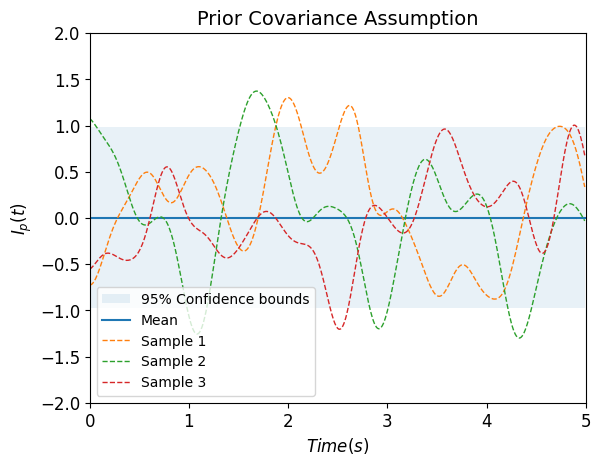

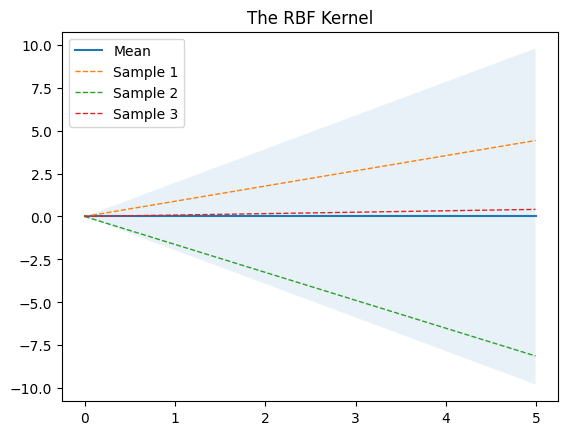

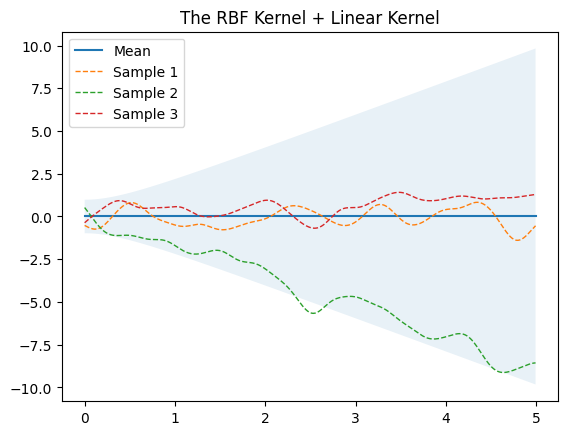

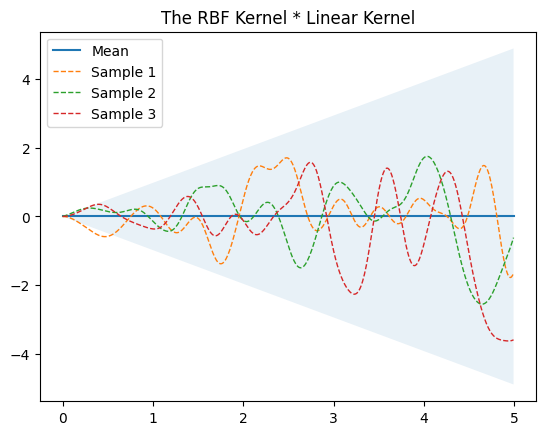

In [11]:
# ------------------------------------------------------------------------------------
#  Prior Distributions, i.e., Haven't seen data points yet
# ------------------------------------------------------------------------------------

# Finite number of points along x-axis i.e., time axis
X = np.arange(0, 5, 0.01).reshape(-1, 1)

# print(X)

length_scale = 0.2
sigma_f = 0.5

# Mean and covariance of the prior
mu = np.zeros(X.shape)
print(f'Size of number of finite samples', X.shape)
print(f'Size of mean', mu.shape)
cov_rbf = kernel_RBF(X, X, length_scale, sigma_f)
cov_lin = kernel_linear(X, X)
cov_multi = cov_rbf * cov_lin
cov_add = cov_rbf + cov_lin

print(f'Size of covariance', cov_add.shape)

# Draw samples from the prior
"""
(np.random.multivariate_normal) is a NumPy's random module that generates samples from a multivariate Gaussian distribution
arguments are mean, covariance, and number of samples i.e., # of R.Vs.
1. feed the mean vector, covariance matirx, and number of samples required
"""
samples_add = np.random.multivariate_normal(mu.ravel(), cov_add, 3)
samples_rbf = np.random.multivariate_normal(mu.ravel(), cov_rbf, 3)
samples_lin = np.random.multivariate_normal(mu.ravel(), cov_lin, 3)
samples_multi = np.random.multivariate_normal(mu.ravel(), cov_multi, 3)
print(f'Size of samples', samples_add.shape)
print("First 5 elements of samples array:", samples_add[5:])

# Plot GP mean, uncertainty region and samples
plt.figure()
plot_gp(mu, cov_rbf, X, samples=samples_rbf)
plt.title('Prior Covariance Assumption', fontsize=14)
plt.xlabel(r'${Time (s)}$', fontsize=12)
plt.ylabel(r'${I_p(t)}$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['95% Confidence bounds', 'Mean', 'Sample 1', 'Sample 2', 'Sample 3'], fontsize=10)
plt.axis([0, 5, -2, 2])
plt.savefig('prior_beliefs.pdf', format='pdf')
#files.download('prior_beliefs.pdf')


plt.figure()
plot_gp(mu, cov_lin, X, samples=samples_lin)
plt.title('The RBF Kernel')
plt.figure()
plot_gp(mu, cov_add, X, samples=samples_add)
plt.title('The RBF Kernel + Linear Kernel')
plt.figure()
plot_gp(mu, cov_multi, X, samples=samples_multi)
plt.title('The RBF Kernel * Linear Kernel')

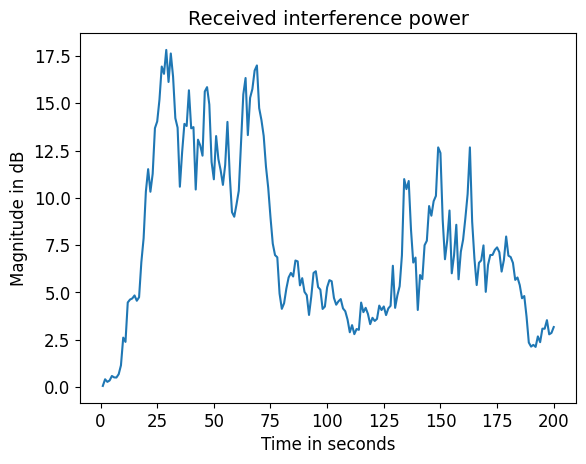

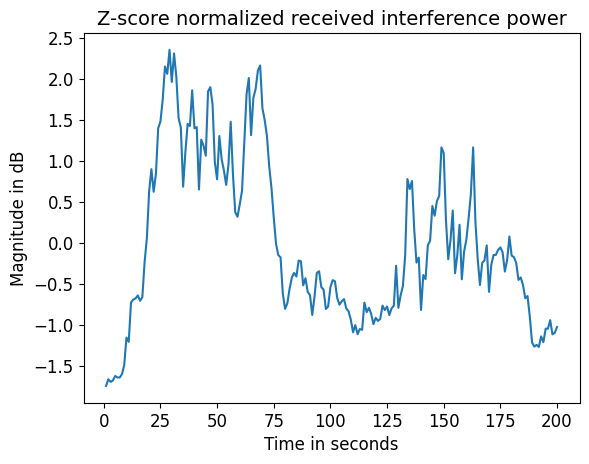

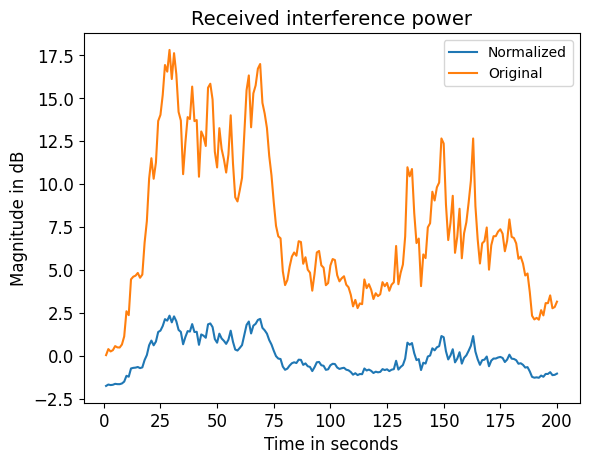

(400, 1)
(400, 400)


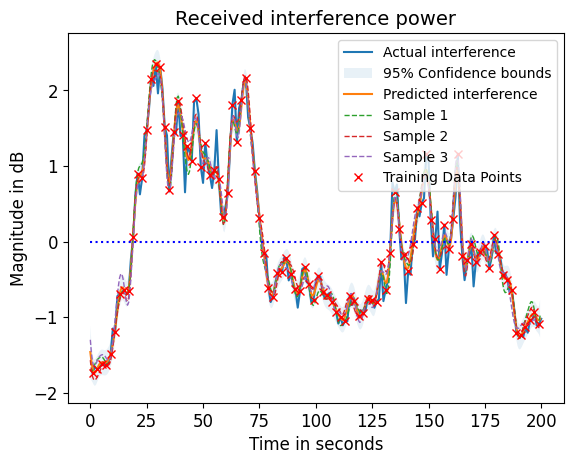

(400, 1)
(400, 400)


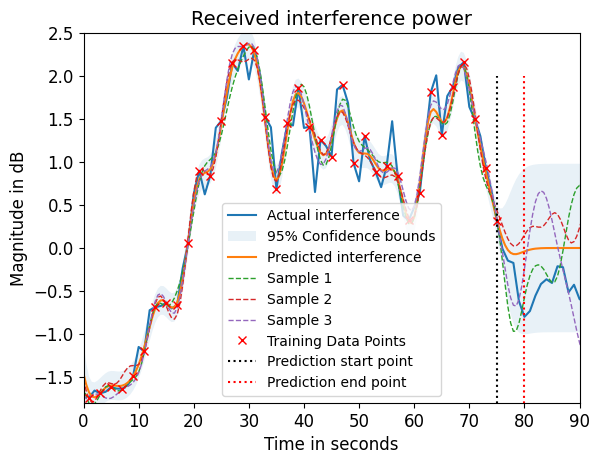

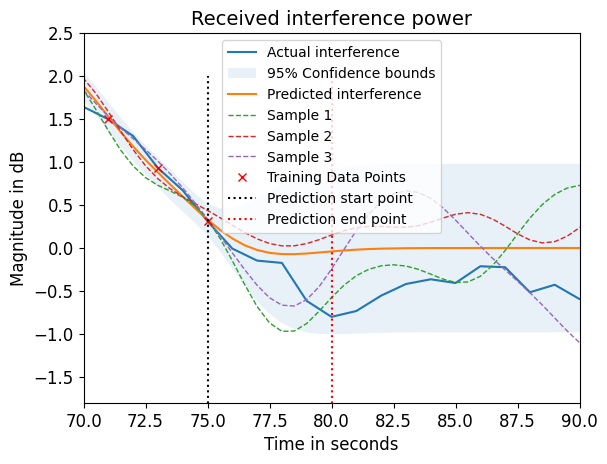

(400, 1)
(400, 400)


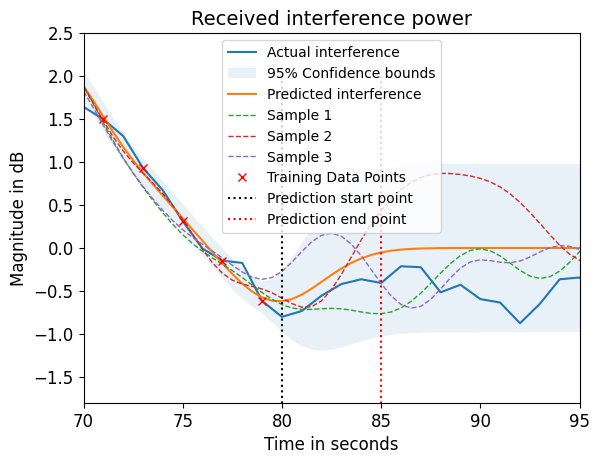

(400, 1)
(400, 400)


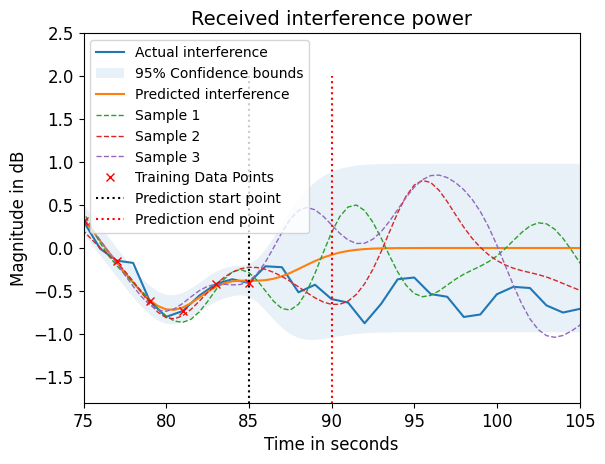

(400, 1)
(400, 400)


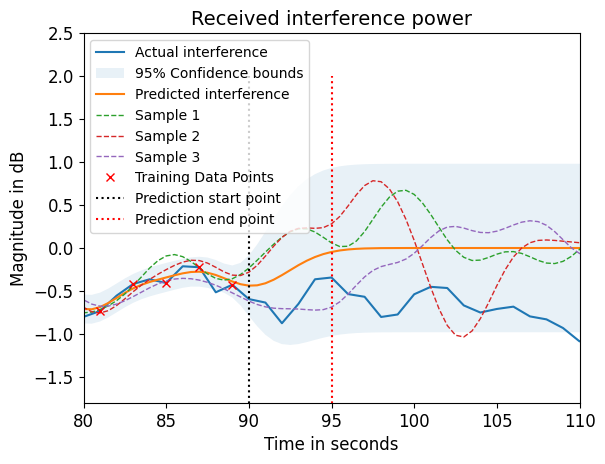

(400, 1)
(400, 400)


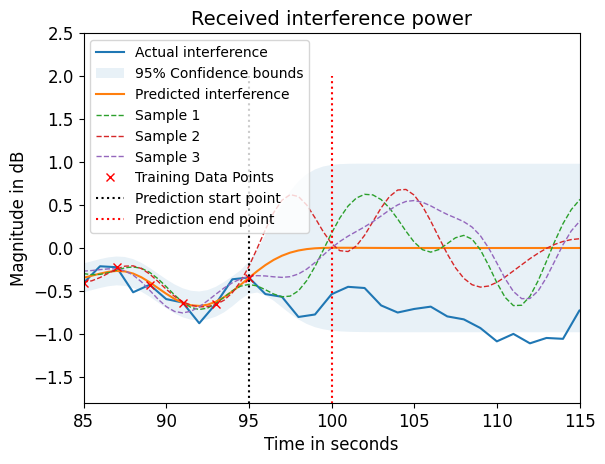

(400, 1)
(400, 400)


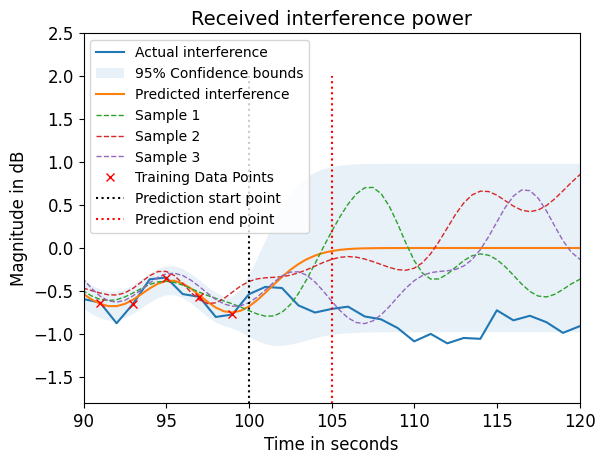

In [12]:
# ------------------------------------------------------------------------------------
#  Posterior Distributions, i.e., where we gather rough knowledge of data
# ------------------------------------------------------------------------------------
# ---------------------------------------------
#  Posterior Distributions based on RBF Kernel
# ---------------------------------------------

def posterior_RBF(X_s, X_train, Y_train, l=2.5, sigma_f=0.5, sigma_y=0.1):
    K = kernel_RBF(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel_RBF(X_train, X_s, l, sigma_f)
    K_ss = kernel_RBF(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)

    # Conditional Mean
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Conditional Covariance
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)

    return mu_s, cov_s

# ------------------------------------------------------------------------------------
#  Loading data points
# ------------------------------------------------------------------------------------

df = pd.read_csv(r'/content/interference_200.csv')

# Extract 'Time' and 'Magnitude' columns as separate 1D NumPy arrays
x = df['Time'].to_numpy()
y = df['Magnitude'].to_numpy()


# ------------------------------------------------------------------------------------
#  Plotting data points
# ------------------------------------------------------------------------------------

# Calculate the mean
mean_y = np.mean(y)
# Calculate the standard deviation
std_dev_y = np.std(y)
# Apply z-score normalization
z_normalized_y = (y - mean_y) / std_dev_y

# Create a new figure
# plot x and y
plt.figure()
plt.plot(x, y)
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Received interference power', fontsize=14)
plt.savefig('Received_interference_power.pdf', format='pdf')
plt.show()


plt.figure()
plt.plot(x, z_normalized_y)
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Z-score normalized received interference power', fontsize=14)
plt.savefig('Z-score_normalized_received_interference_power.pdf', format='pdf')
plt.show()

plt.figure()
plt.plot(x, z_normalized_y)
plt.plot(x, y)
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Received interference power', fontsize=14)
plt.legend(['Normalized', 'Original'])
plt.savefig('Normalized_and_original_data.pdf', format='pdf')
plt.show()


# ------------------------------------------------------------------------------------
#  Plotting the posterior distribution
# ------------------------------------------------------------------------------------

# array[start:end:step]
X = np.arange(0, 200, 0.5).astype(np.float32).reshape(-1, 1)
x_sample = x[0:200:2]
y_sample = z_normalized_y[0:200:2]
X_train = x_sample.reshape(-1, 1)
Y_train = y_sample.reshape(-1, 1)

# Compute mean and covariance of the posterior distribution
mu_s_r, cov_s_r = posterior_RBF(X, X_train, Y_train)
print(mu_s_r.shape)
print(cov_s_r.shape)
samples_r = np.random.multivariate_normal(mu_s_r.ravel(), cov_s_r, 3)

# Plot GP mean, uncertainty region and samples
plt.figure()
plt.plot(x, z_normalized_y)
plot_gp(mu_s_r, cov_s_r, X, X_train, Y_train, samples_r)
plt.legend(['Actual interference', '95% Confidence bounds', 'Predicted interference', 'Sample 1' , 'Sample 2', 'Sample 3',  'Training Data Points'], fontsize=10)
#plt.plot([x_lower, x_upper], [y_lower, y_upper], ':r') # 0 dB
plt.plot([0, 200], [0, 0], ':b')
plt.title('Received interference power', fontsize=14)
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Total_prediction.pdf', format='pdf')
plt.show()

# ------------------------------------------------------------------------------------
#  First Prediction
# ------------------------------------------------------------------------------------
x_sample1 = x[0:75:2]
y_sample1 = z_normalized_y[0:75:2]
X_train1 = x_sample1.reshape(-1, 1)
Y_train1 = y_sample1.reshape(-1, 1)

# Compute mean and covariance of the posterior distribution
mu_s_r1, cov_s_r1 = posterior_RBF(X, X_train1, Y_train1)
print(mu_s_r1.shape)
print(cov_s_r1.shape)
samples_r1 = np.random.multivariate_normal(mu_s_r1.ravel(), cov_s_r1, 3)

plt.figure()
plt.plot(x, z_normalized_y)
plot_gp(mu_s_r1, cov_s_r1, X, X_train1, Y_train1, samples_r1)
#plt.plot([x_lower, x_upper], [y_lower, y_upper], ':r') # 0 dB
plt.plot([75, 75], [-2, 2], ':k')
plt.plot([80, 80], [-2, 2], ':r')
plt.axis([0, 90, -1.8, 2.5])
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Actual interference', '95% Confidence bounds', 'Predicted interference', 'Sample 1' , 'Sample 2', 'Sample 3',  'Training Data Points', 'Prediction start point', 'Prediction end point'], fontsize=10)
plt.title('Received interference power', fontsize=14)
plt.savefig('First_from_zero.pdf', format='pdf')
plt.show()
#files.download('plot.pdf')


plt.figure()
plt.plot(x, z_normalized_y)
plot_gp(mu_s_r1, cov_s_r1, X, X_train1, Y_train1, samples_r1)
#plt.plot([x_lower, x_upper], [y_lower, y_upper], ':r') # 0 dB
plt.plot([75, 75], [-2, 2], ':k')
plt.plot([80, 80], [-2, 2], ':r')
plt.axis([70, 90, -1.8, 2.5])
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Actual interference', '95% Confidence bounds', 'Predicted interference', 'Sample 1' , 'Sample 2', 'Sample 3',  'Training Data Points', 'Prediction start point', 'Prediction end point'], fontsize=10)
plt.title('Received interference power', fontsize=14)
plt.savefig('First.pdf', format='pdf')
plt.show()
#files.download('plot.pdf')

# ------------------------------------------------------------------------------------
#  Second Prediction
# ------------------------------------------------------------------------------------
x_sample2 = x[0:80:2]
y_sample2 = z_normalized_y[0:80:2]
X_train2 = x_sample2.reshape(-1, 1)
Y_train2 = y_sample2.reshape(-1, 1)

# Compute mean and covariance of the posterior distribution
mu_s_r2, cov_s_r = posterior_RBF(X, X_train2, Y_train2)
print(mu_s_r2.shape)
print(cov_s_r.shape)
samples_r = np.random.multivariate_normal(mu_s_r2.ravel(), cov_s_r, 3)

plt.figure()
plt.plot(x, z_normalized_y)
plot_gp(mu_s_r2, cov_s_r, X, X_train2, Y_train2, samples_r)
#plt.plot([x_lower, x_upper], [y_lower, y_upper], ':r') # 0 dB
plt.plot([80, 80], [-2, 2], ':k')
plt.plot([85, 85], [-2, 2], ':r')
plt.axis([70, 95, -1.8, 2.5])
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Actual interference', '95% Confidence bounds', 'Predicted interference', 'Sample 1' , 'Sample 2', 'Sample 3',  'Training Data Points', 'Prediction start point', 'Prediction end point'], fontsize=10)
plt.title('Received interference power', fontsize=14)
plt.savefig('Second.pdf', format='pdf')
plt.show()
#files.download('plot.pdf')


# ------------------------------------------------------------------------------------
#  Third Prediction
# ------------------------------------------------------------------------------------
x_sample3 = x[0:85:2]
y_sample3 = z_normalized_y[0:85:2]
X_train3 = x_sample3.reshape(-1, 1)
Y_train3 = y_sample3.reshape(-1, 1)

# Compute mean and covariance of the posterior distribution
mu_s_r, cov_s_r = posterior_RBF(X, X_train3, Y_train3)
print(mu_s_r.shape)
print(cov_s_r.shape)
samples_r = np.random.multivariate_normal(mu_s_r.ravel(), cov_s_r, 3)

plt.figure()
plt.plot(x, z_normalized_y)
plot_gp(mu_s_r, cov_s_r, X, X_train3, Y_train3, samples_r)
#plt.plot([x_lower, x_upper], [y_lower, y_upper], ':r') # 0 dB
plt.plot([85, 85], [-2, 2], ':k')
plt.plot([90, 90], [-2, 2], ':r')
plt.axis([75, 105, -1.8, 2.5])
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Actual interference', '95% Confidence bounds', 'Predicted interference', 'Sample 1' , 'Sample 2', 'Sample 3',  'Training Data Points', 'Prediction start point', 'Prediction end point'], fontsize=10)
plt.title('Received interference power', fontsize=14)
plt.savefig('Third.pdf', format='pdf')
plt.show()
#files.download('plot.pdf')


# ------------------------------------------------------------------------------------
#  Fourth Prediction
# ------------------------------------------------------------------------------------
x_sample4 = x[0:90:2]
y_sample4 = z_normalized_y[0:90:2]
X_train4 = x_sample4.reshape(-1, 1)
Y_train4 = y_sample4.reshape(-1, 1)

# Compute mean and covariance of the posterior distribution
mu_s_r, cov_s_r = posterior_RBF(X, X_train4, Y_train4)
print(mu_s_r.shape)
print(cov_s_r.shape)
samples_r = np.random.multivariate_normal(mu_s_r.ravel(), cov_s_r, 3)

plt.figure()
plt.plot(x, z_normalized_y)
plot_gp(mu_s_r, cov_s_r, X, X_train4, Y_train4, samples_r)
#plt.plot([x_lower, x_upper], [y_lower, y_upper], ':r') # 0 dB
plt.plot([90, 90], [-2, 2], ':k')
plt.plot([95, 95], [-2, 2], ':r')
plt.axis([80, 110, -1.8, 2.5])
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Actual interference', '95% Confidence bounds', 'Predicted interference', 'Sample 1' , 'Sample 2', 'Sample 3',  'Training Data Points', 'Prediction start point', 'Prediction end point'], fontsize=10)
plt.title('Received interference power', fontsize=14)
plt.savefig('Fourth.pdf', format='pdf')
plt.show()
#files.download('plot.pdf')


# ------------------------------------------------------------------------------------
#  Fifth Prediction
# ------------------------------------------------------------------------------------
x_sample5 = x[0:95:2]
y_sample5 = z_normalized_y[0:95:2]
X_train5 = x_sample5.reshape(-1, 1)
Y_train5 = y_sample5.reshape(-1, 1)

# Compute mean and covariance of the posterior distribution
mu_s_r, cov_s_r = posterior_RBF(X, X_train5, Y_train5)
print(mu_s_r.shape)
print(cov_s_r.shape)
samples_r = np.random.multivariate_normal(mu_s_r.ravel(), cov_s_r, 3)

plt.figure()
plt.plot(x, z_normalized_y)
plot_gp(mu_s_r, cov_s_r, X, X_train5, Y_train5, samples_r)
#plt.plot([x_lower, x_upper], [y_lower, y_upper], ':r') # 0 dB
plt.plot([95, 95], [-2, 2], ':k')
plt.plot([100, 100], [-2, 2], ':r')
plt.axis([85, 115, -1.8, 2.5])
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Actual interference', '95% Confidence bounds', 'Predicted interference', 'Sample 1' , 'Sample 2', 'Sample 3',  'Training Data Points', 'Prediction start point', 'Prediction end point'], fontsize=10)
plt.title('Received interference power', fontsize=14)
plt.savefig('Fifth.pdf', format='pdf')
plt.show()
#files.download('plot.pdf')

# ------------------------------------------------------------------------------------
#  Sixth Prediction
# ------------------------------------------------------------------------------------
x_sample6 = x[0:100:2]
y_sample6 = z_normalized_y[0:100:2]
X_train6 = x_sample6.reshape(-1, 1)
Y_train6 = y_sample6.reshape(-1, 1)

# Compute mean and covariance of the posterior distribution
mu_s_r, cov_s_r = posterior_RBF(X, X_train6, Y_train6)
print(mu_s_r.shape)
print(cov_s_r.shape)
samples_r = np.random.multivariate_normal(mu_s_r.ravel(), cov_s_r, 3)

plt.figure()
plt.plot(x, z_normalized_y)
plot_gp(mu_s_r, cov_s_r, X, X_train6, Y_train6, samples_r)
#plt.plot([x_lower, x_upper], [y_lower, y_upper], ':r') # 0 dB
plt.plot([100, 100], [-2, 2], ':k')
plt.plot([105, 105], [-2, 2], ':r')
plt.axis([90, 120, -1.8, 2.5])
plt.xlabel('Time in seconds', fontsize=12)
plt.ylabel('Magnitude in dB', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Actual interference', '95% Confidence bounds', 'Predicted interference', 'Sample 1' , 'Sample 2', 'Sample 3',  'Training Data Points', 'Prediction start point', 'Prediction end point'], fontsize=10)
plt.title('Received interference power', fontsize=14)
plt.savefig('Sixth.pdf', format='pdf')
plt.show()
#files.download('plot.pdf')



<ipython-input-13-5209c330a6a2>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.log2(1 + abs(c_in))
<ipython-input-13-5209c330a6a2>:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R_value_predicted = (D / C_func(gama_predicted)) + (((Q_inv_func(outage_value)**2) * V_func(gama_predicted)) / (2 * (C_func(gama_predicted)**2))) * (1 + math.sqrt(1 + (4 * D * C_func(gama_predicted)) / ((Q_inv_func(outage_value)**2) * V_func(gama_predicted))))
<ipython-input-13-5209c330a6a2>:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from yo

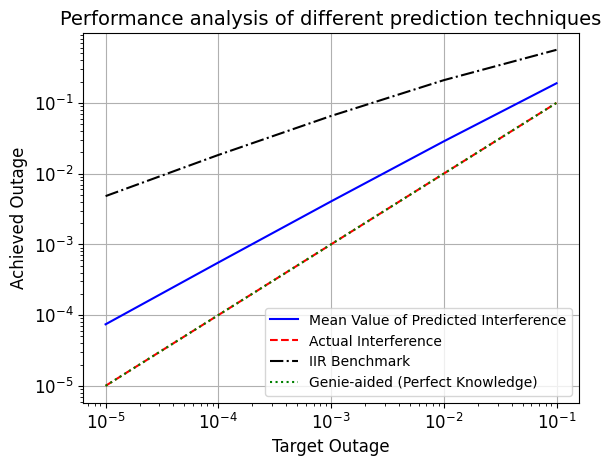

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc, erfinv
import statistics
import pandas as pd  # Missing import for pandas

# Updated function to generate only the first figure
def alloc_resour(sum_interference, signal, predicted_interference, actual_interference):
    """
    Resource allocation based on predicted interference (I_p), actual interference (I),
    IIR baseline, and Genie-aided techniques.

    :param sum_interference: The total interference (actual)
    :param signal: Signal power
    :param predicted_interference: Predicted interference (mean of I_p from GP)
    :param actual_interference: Actual interference (I)
    """
    # Absolute values of interference and signal
    sum_interference = [abs(i) for i in sum_interference]
    predicted_interference = [abs(i) for i in predicted_interference]
    actual_interference = [abs(i) for i in actual_interference]
    signal = [abs(i) for i in signal]

    total_length = len(sum_interference)

    # Ensure all arrays are long enough for the given time instances
    min_length = min(len(signal), len(actual_interference), len(predicted_interference))

    # If time_instances exceed the data length, restrict them
    time_instances = [t for t in [0, 3, 5, 7, 10, 13, 15, 17] if t < min_length]

    def C_func(c_in):
        return math.log2(1 + abs(c_in))

    def V_func(v_in):
        return (1 / (math.log(2)**2)) * (1 - (1 / ((1 + v_in)**2)))

    def Q_func(q_in):
        return 0.5 * erfc(q_in / (math.sqrt(2)))

    def Q_inv_func(qinv_in):
        return math.sqrt(2) * erfinv(1 - 2 * qinv_in)

    ################# Moving average-based IIR estimation #######################
    ff = 0.01
    I_ests = []
    I_ts = []
    I_est = statistics.mean(sum_interference)
    I_ests.append(I_est)
    I_t = sum_interference[-1]  # Initial IIR value
    I_ts.append(I_t)

    for i in range(len(sum_interference)):
        I_est_temp = ff * I_ts[i] + (1 - ff) * I_ests[i]
        I_ests.append(I_est_temp)
        I_ts.append(sum_interference[i])

    I_est_real = I_ests[1:]  # IIR estimation

    ################# Resource Allocation #######################

    D = 50
    target_outage_set = [0.00001, 0.0001, 0.001, 0.01, 0.1]

    for t in time_instances[:1]:  # Only process the first time instance
        e_values_predicted = []
        e_values_actual = []
        e_values_IIR = []
        e_values_genie = []

        for outage_value in target_outage_set:
            gama_actual = signal[t] / (actual_interference[t] + 1)
            gama_predicted = signal[t] / (predicted_interference[t] + 1)
            gama_IIR = signal[t] / (I_est_real[t] + 1)
            gama_genie = signal[t] / (actual_interference[t] + 1)  # Genie-aided assumes perfect knowledge of actual interference

            # Predicted interference
            R_value_predicted = (D / C_func(gama_predicted)) + (((Q_inv_func(outage_value)**2) * V_func(gama_predicted)) / (2 * (C_func(gama_predicted)**2))) * (1 + math.sqrt(1 + (4 * D * C_func(gama_predicted)) / ((Q_inv_func(outage_value)**2) * V_func(gama_predicted))))
            e_value_predicted = Q_func(((R_value_predicted * C_func(gama_actual)) - D) / (math.sqrt(R_value_predicted * V_func(gama_actual))))
            e_values_predicted.append(e_value_predicted)

            # Actual interference
            R_value_actual = (D / C_func(gama_actual)) + (((Q_inv_func(outage_value)**2) * V_func(gama_actual)) / (2 * (C_func(gama_actual)**2))) * (1 + math.sqrt(1 + (4 * D * C_func(gama_actual)) / ((Q_inv_func(outage_value)**2) * V_func(gama_actual))))
            e_value_actual = Q_func(((R_value_actual * C_func(gama_actual)) - D) / (math.sqrt(R_value_actual * V_func(gama_actual))))
            e_values_actual.append(e_value_actual)

            # IIR baseline
            R_value_IIR = (D / C_func(gama_IIR)) + (((Q_inv_func(outage_value)**2) * V_func(gama_IIR)) / (2 * (C_func(gama_IIR)**2))) * (1 + math.sqrt(1 + (4 * D * C_func(gama_IIR)) / ((Q_inv_func(outage_value)**2) * V_func(gama_IIR))))
            e_value_IIR = Q_func(((R_value_IIR * C_func(gama_actual)) - D) / (math.sqrt(R_value_IIR * V_func(gama_actual))))
            e_values_IIR.append(e_value_IIR)

            # Genie-aided
            R_value_genie = (D / C_func(gama_genie)) + (((Q_inv_func(outage_value)**2) * V_func(gama_genie)) / (2 * (C_func(gama_genie)**2))) * (1 + math.sqrt(1 + (4 * D * C_func(gama_genie)) / ((Q_inv_func(outage_value)**2) * V_func(gama_genie))))
            e_value_genie = Q_func(((R_value_genie * C_func(gama_actual)) - D) / (math.sqrt(R_value_genie * V_func(gama_actual))))
            e_values_genie.append(e_value_genie)

        # Plotting
        plt.plot(target_outage_set, e_values_predicted, 'b', label="Mean Value of Predicted Interference")
        plt.plot(target_outage_set, e_values_actual, '--r', label="Actual Interference")
        plt.plot(target_outage_set, e_values_IIR, '-.k', label="IIR Benchmark")
        plt.plot(target_outage_set, target_outage_set, ':g', label="Genie-aided (Perfect Knowledge)")
        plt.grid()
        plt.xlabel('Target Outage', fontsize=12)
        plt.ylabel('Achieved Outage', fontsize=12)
        plt.semilogy()
        plt.semilogx()
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend(fontsize=10)
        plt.title(f"Performance analysis of different prediction techniques", fontsize=14)
        plt.savefig(f'Performance_analysis_t={t}.pdf', format='pdf')
        plt.show(block=False)
        plt.pause(3)
        plt.close()


# ------------------------------------------------------------------------------------
#  Loading data points
# ------------------------------------------------------------------------------------

# Correctly importing the data using pandas
df1 = pd.read_csv(r'/content/interference_200.csv')
# Extract 'Time' and 'Magnitude' columns as separate 1D NumPy arrays
y = df['Magnitude'].to_numpy()
# Calculate the mean
mean_y = np.mean(y)
# Calculate the standard deviation
std_dev_y = np.std(y)
# Apply z-score normalization
sum_interference = (y - mean_y) / std_dev_y

df2 = pd.read_csv(r'/content/signal_200.csv')
signal = df2['Signal'].to_numpy()

# Assuming mu_s and actual_interference is derived elsewhere (replace with correct logic)
predicted_interference = mu_s_r2[0:85]  # Adjust as per your actual data and prediction model
actual_interference = sum_interference[0:85]

# Run resource allocation
alloc_resour(sum_interference, signal, predicted_interference, actual_interference)

